In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
start_df = pd.read_csv('Data.csv')

# Best way to avoid ambiguities with european vs US date format
start_df["Dates"] = pd.to_datetime(start_df["Dates"], format="%m/%d/%Y")
start_df = start_df.sort_values("Dates")
start_df.head()

,Dates,Brazil_Equity,Germany_Equity,Nasdaq,Japan_Equity,Australia_Equity,Spain_Equity,US_2y,US_10y,Germany_2y,...,Wheat,Corn,Rice,Copper,EURUSD,USDJPY,CHFJPY,CADBRL,GBPMXN,SGDBRL
0,2010-05-06,63907,5932.5,1886.00,10680,4573,9272.5,109.195312,119.921875,109.680,...,497.25,364.00,11.650,310.35,1.2733,92.25,83.269,1.7596,19.2042,1.3131
1,2010-05-07,63191,5722.0,1848.50,10430,4474,8928.0,109.101562,119.687500,109.635,...,500.25,364.75,11.535,313.10,1.2755,91.59,82.669,1.7547,19.0523,1.3130
2,2010-05-10,66047,6000.5,1939.50,10540,4610,10248.0,109.039062,118.937500,109.525,...,482.50,363.00,11.690,321.50,1.2810,93.26,84.095,1.7361,18.6127,1.2902
3,2010-05-11,64886,6042.5,1935.25,10400,4557,10005.5,109.039062,119.015625,109.575,...,483.75,369.75,11.690,319.40,1.2743,93.07,84.132,1.7460,18.6594,1.2866
4,2010-05-12,65668,6196.0,1972.75,10370,4583,10078.5,109.015625,118.796875,109.610,...,482.75,371.75,11.785,317.60,1.2656,93.16,83.971,1.7372,18.4502,1.2829


In [28]:
# First general check
start_df.describe()

# Count yields 3900 days so there are no Sundays and Saturdays inside.

,Dates,Brazil_Equity,Germany_Equity,Nasdaq,Japan_Equity,Australia_Equity,Spain_Equity,US_2y,US_10y,Germany_2y,...,Wheat,Corn,Rice,Copper,EURUSD,USDJPY,CHFJPY,CADBRL,GBPMXN,SGDBRL
count,3912,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,...,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000
mean,2017-11-03 02:23:33.496932608,82862.594070,11773.996472,8030.895118,20967.484663,5947.802147,9365.683282,107.809348,124.837579,110.236998,...,604.745974,487.023326,13.620003,334.643648,1.183248,111.486439,118.801806,2.908073,23.619065,2.728624
min,2010-05-06 00:00:00,37694.000000,5080.000000,1721.250000,8160.000000,3879.000000,5948.300000,101.015625,105.421875,104.535000,...,361.000000,301.500000,9.125000,194.350000,0.958200,75.810000,77.436000,1.605600,18.132700,1.250600
25%,2014-02-03 18:00:00,57311.000000,9190.750000,3551.187500,14777.500000,5127.000000,8505.325000,106.015625,120.105469,109.330000,...,502.000000,369.250000,11.663750,275.175000,1.094600,101.665000,107.345500,2.119550,21.467600,1.803900
50%,2017-11-02 12:00:00,73309.000000,11838.750000,6230.000000,20350.000000,5778.000000,9299.700000,109.328125,126.023438,110.935000,...,577.250000,431.750000,13.525000,327.375000,1.141350,109.650000,114.075000,2.789350,23.801800,2.667000
75%,2021-08-03 06:00:00,110257.500000,13918.250000,12404.375000,27190.000000,6925.000000,10269.375000,110.109375,130.734375,112.020000,...,688.812500,616.562500,15.480000,389.050000,1.280325,120.140000,124.998250,3.778825,25.698475,3.711125
max,2025-05-02 00:00:00,139123.000000,23474.000000,22250.500000,42370.000000,8522.000000,13480.800000,110.507812,140.328125,112.815000,...,1425.250000,831.250000,22.065000,521.600000,1.487400,161.690000,179.814000,4.595600,30.900000,4.583100
std,NaN,28328.357506,3752.809578,5515.871771,8493.734789,1120.125577,1287.712095,2.866557,7.985446,2.271447,...,142.516819,139.489838,2.428138,71.693699,0.112075,20.783977,24.630245,0.877119,2.772785,0.983323


In [29]:
# Control for integrity
start_df.isna().sum()

Dates               0
Brazil_Equity       0
Germany_Equity      0
Nasdaq              0
Japan_Equity        0
Australia_Equity    0
Spain_Equity        0
US_2y               0
US_10y              0
Germany_2y          0
Germany_10y         0
Japan_10y           0
UK_10y              0
Gold                0
Oil                 0
Wheat               0
Corn                0
Rice                0
Copper              0
EURUSD              0
USDJPY              0
CHFJPY              0
CADBRL              0
GBPMXN              0
SGDBRL              0
dtype: int64

In [30]:
# First exploration plots.
equity_cols = [col for col in start_df.columns if 'Equity' in col]
two_years = [col for col in start_df.columns if '_2y' in col]
ten_years = [col for col in start_df.columns if '_10y' in col]
commodities_agri = ['Wheat','Corn','Rice']
commodities_Metals = ['Gold','Copper']
oil = ['Oil']
nasdaq = ['Nasdaq']
currencies = ['EURUSD', 'USDJPY', 'CHFJPY', 'CADBRL', 'GBPMXN', 'SGDBRL']

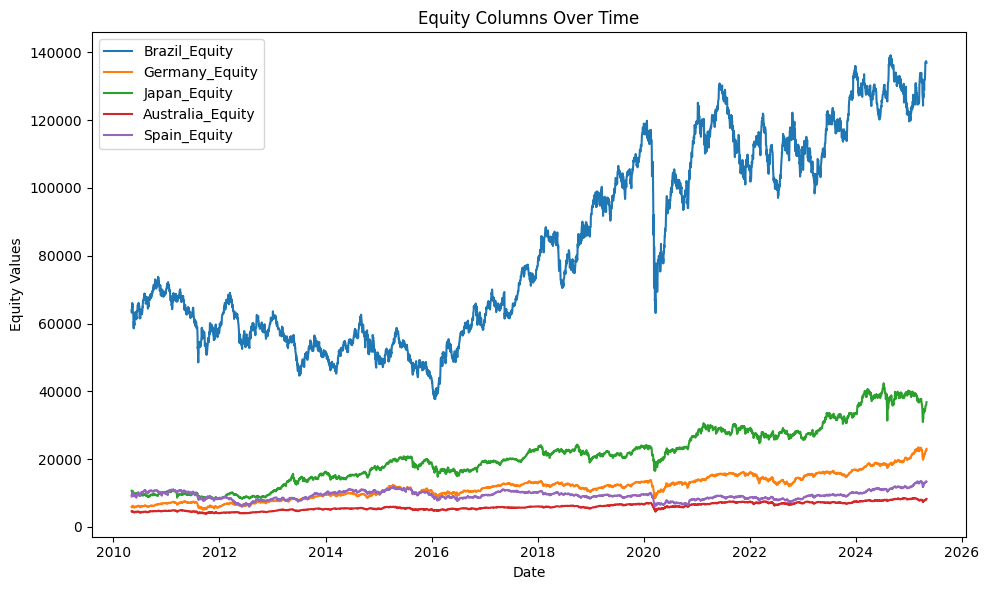

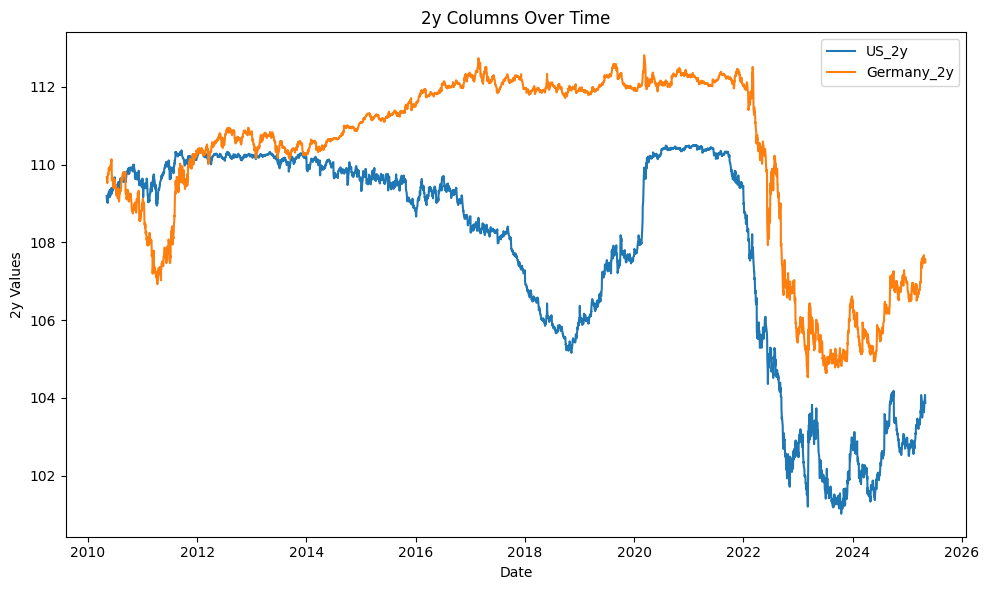

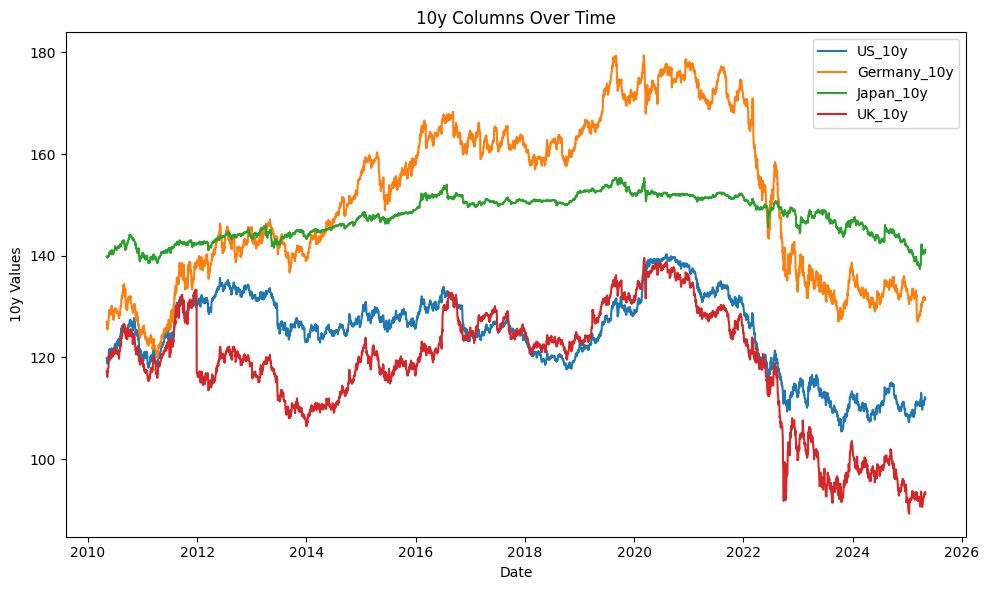

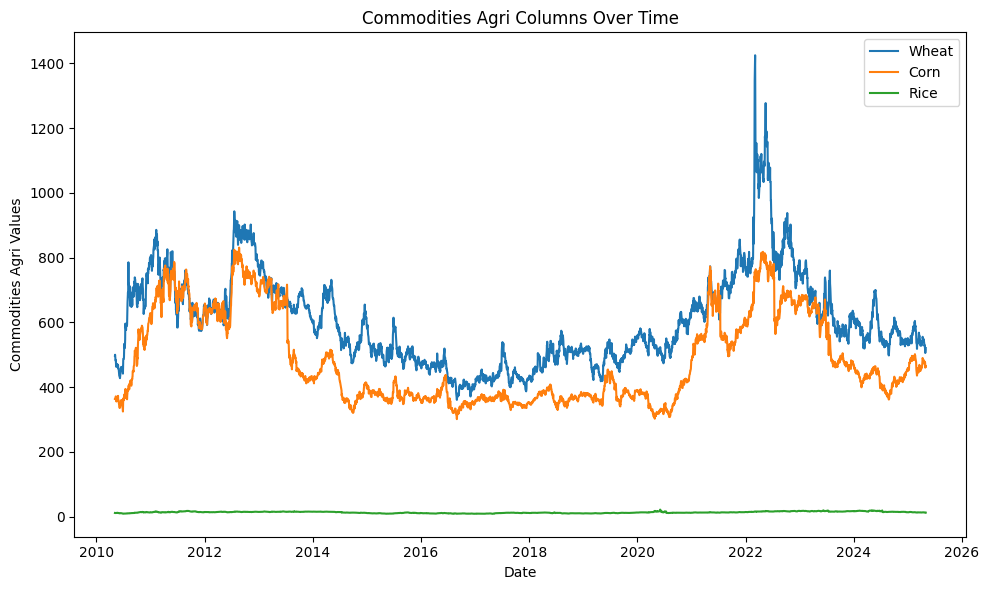

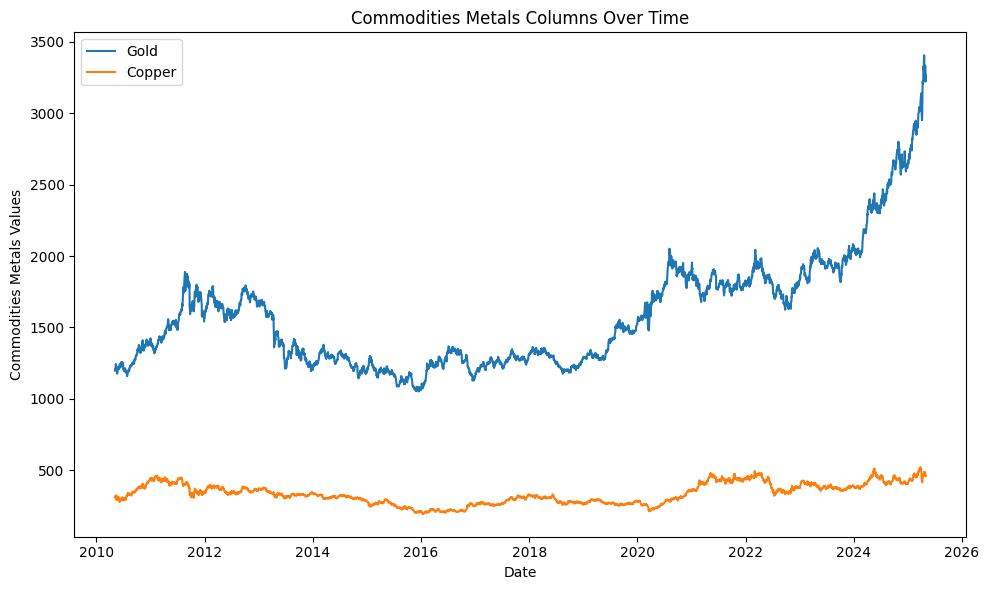

In [31]:
plt.figure(figsize=(10, 6))
for col in equity_cols:
    plt.plot(start_df['Dates'], start_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Equity Values')
plt.title('Equity Columns Over Time')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
for col in two_years:
    plt.plot(start_df['Dates'], start_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('2y Values')
plt.title('2y Columns Over Time')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
for col in ten_years:
    plt.plot(start_df['Dates'], start_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('10y Values')
plt.title('10y Columns Over Time')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
for col in commodities_agri:
    plt.plot(start_df['Dates'], start_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Commodities Agri Values')
plt.title('Commodities Agri Columns Over Time')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
for col in commodities_Metals:
    plt.plot(start_df['Dates'], start_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Commodities Metals Values')
plt.title('Commodities Metals Columns Over Time')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

In [44]:
# Ok, let's roll!
# Set index:

start_df.set_index("Dates", inplace=True)

In [46]:
# Get the log-returns first
df_with_log_returns = np.log(start_df / start_df.shift(1))

/Users/jurigrossi/PycharmProjects/MarPort/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
